
## Assumptions and Parameters

- Initial stock price \( S_0 = 100 \)
- Strike price \( K = 100 \)
- Risk-free interest rate \( r = 5\% \)
- Volatility \( sigma = 20\% \)
- Time to maturity \( T = 1 \) year
- Daily time steps: 252
- Number of simulated paths: 10,000

---


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1
M = 252
N = 10000


## GBM Simulation using Euler-Maruyama

In [2]:

def simulate_gbm_euler_maruyama(S0, r, sigma, T, M, N):
    dt = T / M
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for t in range(1, M + 1):
        Z = np.random.randn(N)
        S[:, t] = S[:, t - 1] * (1 + r * dt + sigma * np.sqrt(dt) * Z)
    return S

S_paths = simulate_gbm_euler_maruyama(S0, r, sigma, T, M, N)


## Payoff Functions for Different Options

In [3]:

def european_call_payoff(S, K):
    return np.maximum(S[:, -1] - K, 0)

def arithmetic_asian_call_payoff(S, K):
    average_price = np.mean(S[:, 1:], axis=1)
    return np.maximum(average_price - K, 0)

def geometric_asian_call_payoff(S, K):
    log_S = np.log(S[:, 1:])
    average_log_price = np.mean(log_S, axis=1)
    geometric_mean = np.exp(average_log_price)
    return np.maximum(geometric_mean - K, 0)

def lookback_call_floating_strike(S):
    min_S = np.min(S[:, 1:], axis=1)
    return np.maximum(S[:, -1] - min_S, 0)


## Monte Carlo Pricing Estimator

In [4]:

def monte_carlo_pricing(payoff, r, T):
    discounted_payoff = np.exp(-r * T) * payoff
    price = np.mean(discounted_payoff)
    stderr = np.std(discounted_payoff) / np.sqrt(len(payoff))
    return price, stderr


## Simulating and Pricing All Options

In [5]:

euro_payoff = european_call_payoff(S_paths, K)
euro_price, euro_se = monte_carlo_pricing(euro_payoff, r, T)

arith_payoff = arithmetic_asian_call_payoff(S_paths, K)
arith_price, arith_se = monte_carlo_pricing(arith_payoff, r, T)

geo_payoff = geometric_asian_call_payoff(S_paths, K)
geo_price, geo_se = monte_carlo_pricing(geo_payoff, r, T)

lookback_payoff = lookback_call_floating_strike(S_paths)
lookback_price, lookback_se = monte_carlo_pricing(lookback_payoff, r, T)

results = pd.DataFrame({
    "Option Type": ["European Call", "Arithmetic Asian Call", "Geometric Asian Call", "Lookback Call"],
    "Price Estimate": [euro_price, arith_price, geo_price, lookback_price],
    "Std. Error": [euro_se, arith_se, geo_se, lookback_se]
})
results


,Option Type,Price Estimate,Std. Error
0,European Call,10.418883,0.148279
1,Arithmetic Asian Call,5.773490,0.080013
2,Geometric Asian Call,5.557967,0.077254
3,Lookback Call,16.543939,0.146970


## Sample GBM Paths

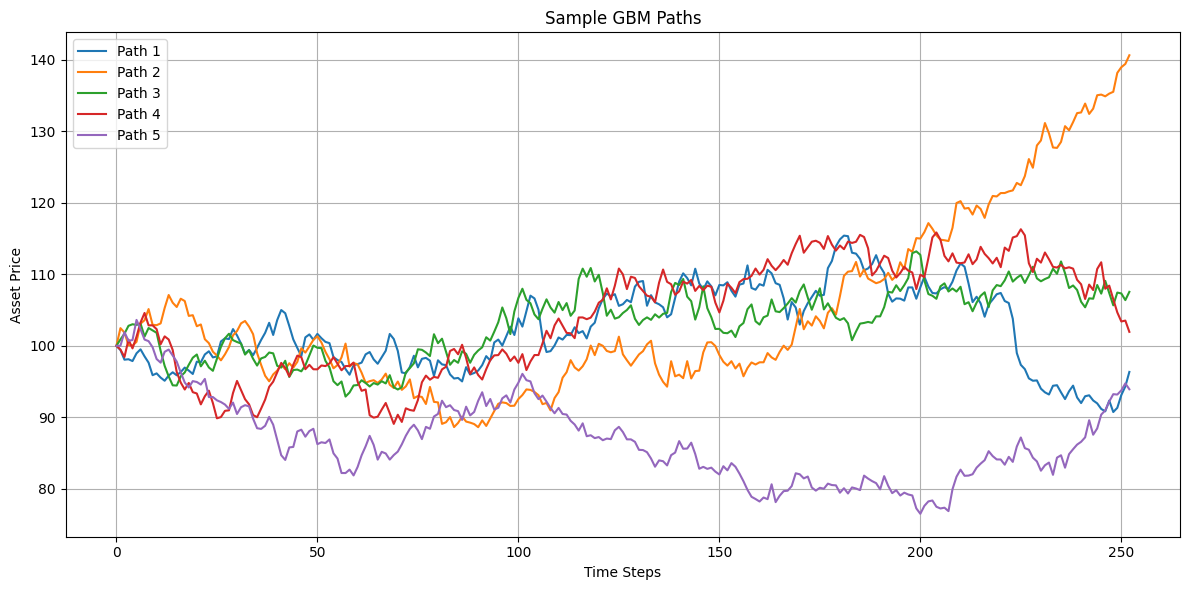

In [6]:

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(S_paths[i], label=f'Path {i+1}')
plt.title("Sample GBM Paths")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## Conclusion

- European options have a higher value than Asian options due to less averaging.
- Arithmetic Asian calls are typically more valuable than geometric ones.
- Lookback options have the highest value due to their path dependency and optimal floating strike.
- Further improvements can be made using variance reduction techniques.
